In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

#for spliting the data into train and test data we use
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

import seaborn as sns
#StratifiedShuffleSplit

In [2]:
housing = pd.read_csv("California Housing Prices.csv")

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

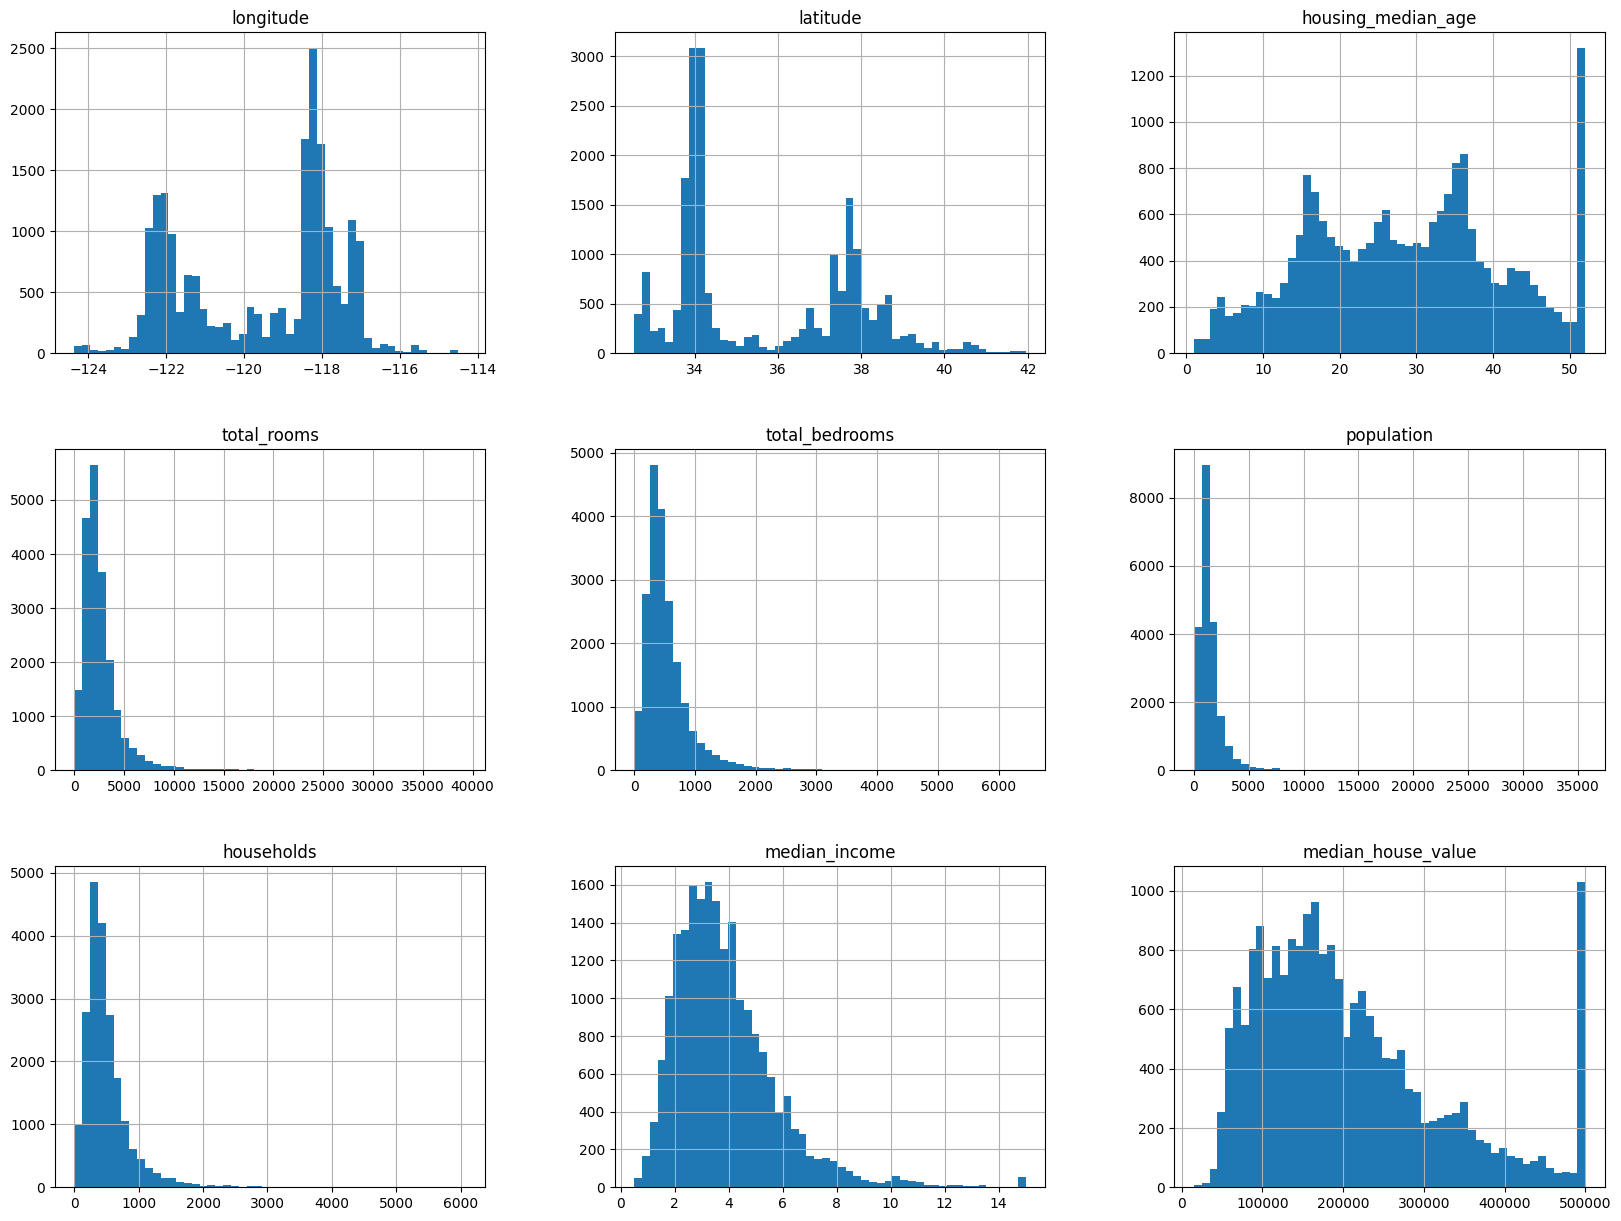

In [8]:
housing.hist(bins=50,figsize=(20,15))

In [9]:
housing.corr(numeric_only=True) #median_income is the only iteam that is closly propertional to median_house_value

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [10]:
housing["median_income"].min()

0.4999

# separate the train and test values with equal distribution

In [11]:
housing["median_income"].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

In [12]:
#spliting the median_income with equal distribution
housing["income_cat"] = pd.cut(housing["median_income"],bins={0.,1.5,3.0,4.5,6.,np.inf},labels={1,2,3,4,5},) 
#np.inf = infinity

<Axes: >

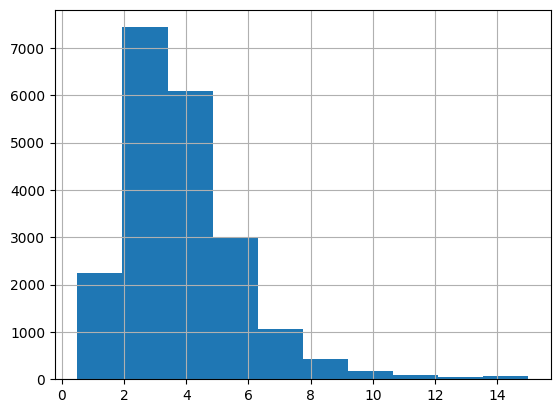

In [13]:
housing["median_income"].hist()

<Axes: >

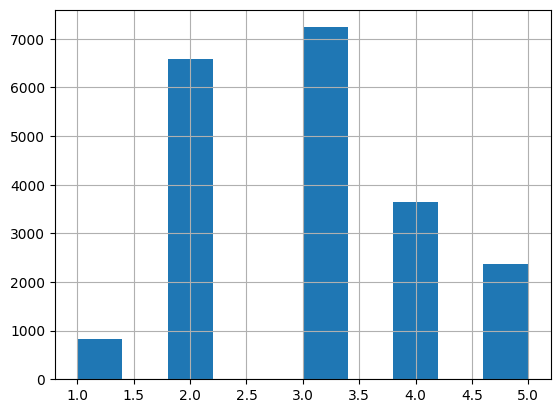

In [14]:
housing["income_cat"].hist()

In [15]:
sp = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=30)

In [16]:
# for train_idx,test_idx in sp.split(housing,housing["income_cat"]):
#     train_set = housing.loc[train_idx]
#     test_set =  housing.loc[test_idx]

for train_idx,test_idx in sp.split(housing,housing["income_cat"]):
    train_set = housing.loc[train_idx]
    test_set = housing.loc[test_idx]
    

In [17]:
train_set.shape

(16512, 11)

In [18]:
test_set.shape

(4128, 11)

<Axes: >

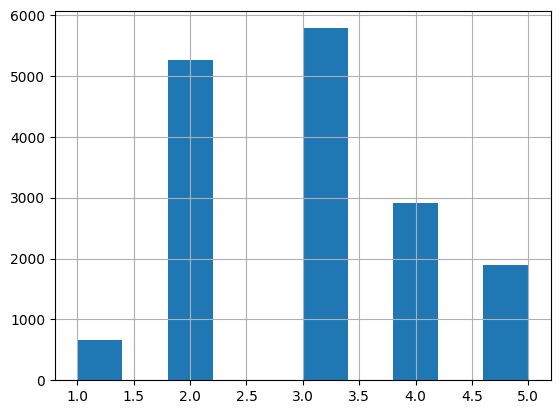

In [19]:
train_set["income_cat"].hist()

<Axes: >

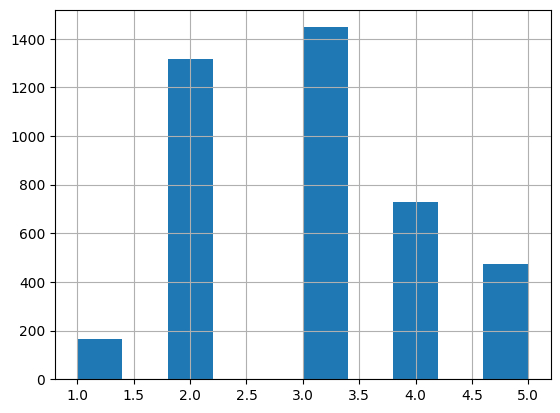

In [20]:
test_set["income_cat"].hist()

In [21]:
#x_train,x_test = train_test_split(housing,test_size=0.2,random_state=30,stratify=housing["income_cat"])

In [22]:
 test_set["income_cat"].value_counts() / len(test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [23]:
 train_set["income_cat"].value_counts() / len(train_set)

income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

In [24]:
housing["income_cat"].value_counts()/len(housing["income_cat"])

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [25]:
# now drop the column "income_cat"

In [26]:
train_set.drop("income_cat",axis=1,inplace=True)
test_set.drop("income_cat",axis=1,inplace=True)

In [27]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3835,-118.43,34.19,27.0,3440.0,739.0,1827.0,712.0,4.1250,245500.0,<1H OCEAN
11955,-117.45,33.91,29.0,2320.0,422.0,1358.0,415.0,3.7333,121400.0,INLAND
16503,-121.13,37.74,28.0,409.0,104.0,244.0,98.0,3.4643,90900.0,INLAND
19971,-119.11,36.21,10.0,1972.0,455.0,1469.0,442.0,1.5407,58400.0,INLAND
1586,-121.96,37.85,10.0,3209.0,379.0,1199.0,392.0,12.2478,500001.0,INLAND


In [28]:
# now making a copy of the train_set to analysing the data better
copy_train = train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

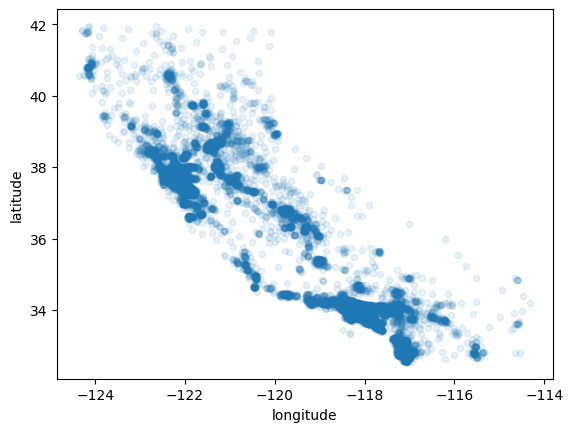

In [29]:
copy_train.plot(x="longitude",y="latitude",alpha=0.1,kind="scatter")

<Axes: xlabel='longitude', ylabel='latitude'>

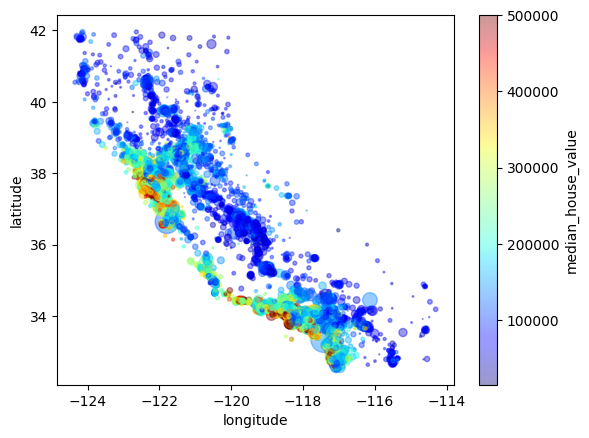

In [30]:
copy_train.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,s=copy_train["population"]/100,c="median_house_value",cmap=plt.get_cmap("jet"))
#here s is the size controlling attribute and it is divided by 100 to smaller the dot size
#c is the color bar attritube

In [31]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3835,-118.43,34.19,27.0,3440.0,739.0,1827.0,712.0,4.1250,245500.0,<1H OCEAN
11955,-117.45,33.91,29.0,2320.0,422.0,1358.0,415.0,3.7333,121400.0,INLAND
16503,-121.13,37.74,28.0,409.0,104.0,244.0,98.0,3.4643,90900.0,INLAND
19971,-119.11,36.21,10.0,1972.0,455.0,1469.0,442.0,1.5407,58400.0,INLAND
1586,-121.96,37.85,10.0,3209.0,379.0,1199.0,392.0,12.2478,500001.0,INLAND


# Prepare the Data for Machine Learning Algorithms


In [32]:
housing_data = train_set.drop("median_house_value",axis=1)
housing_target = train_set["median_house_value"].copy()

In [33]:
housing_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        173
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

# now we will process the null values

In [34]:
from sklearn.impute import SimpleImputer
#SimpleImputer helps us handeling the missing values

In [35]:
imputer = SimpleImputer(strategy='median')
#i need to remove the non_numaric columns from the housing dataset
housing_numaric = housing_data.drop("ocean_proximity",axis=1)
x = imputer.fit_transform(housing_numaric)


In [36]:
#x is now a numpy array we need to convert it into a pandas dataframe
housing_numaric_data= pd.DataFrame(x,columns=housing_numaric.columns,index=housing_numaric.index)

In [37]:
housing_numaric_data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

# Handling Text and Categorical Attributes

In [38]:
housing_cat = housing[["ocean_proximity"]] # if we write housing["ocean_proximity"] it give us an error later
housing_cat.head(10)

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
5,NEAR BAY
6,NEAR BAY
7,NEAR BAY
8,NEAR BAY
9,NEAR BAY


In [39]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[0:10]



array([[3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.]])

In [40]:
 ordinal_encoder.categories_


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [41]:
#converting it into a dummy attribute
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 20640 stored elements and shape (20640, 5)>

In [42]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])